# 1. Who are TOP-5 publishers who released the biggest amount of successful videogames?

### Description: in this case a videogame is considered 'successfull' when at least 10 million copies of it is sold globally.

### Input code:

In [ ]:
SELECT
  publisher,
  COUNT(name) AS top_games
FROM `sql-study-409813.Test.videogames`
WHERE 
  global_sales >= 10
GROUP BY
  publisher
ORDER BY
  top_games DESC
LIMIT
  5

### Output data:

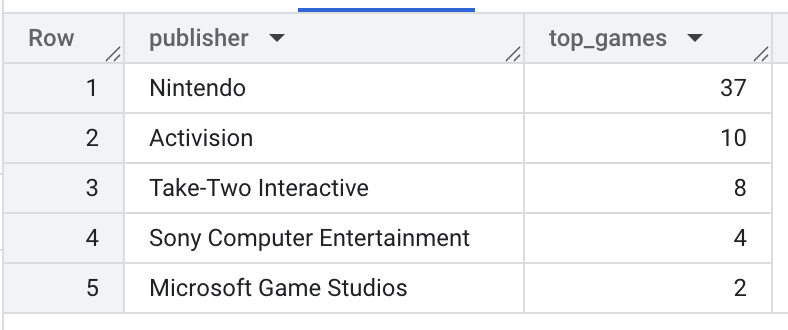

### Brief exploration of an insight:
The output data shows us that a lot of Nintendo games are popular by sales which is almost 4 time more than the result of the second place, Activision.

# 2. What is the list videogames which were relatively popular and had similar sales in all main regions: North America, Europe, and Japan?

### Description: in this case we suppose that the difference in sales is at most +/- 0,5 mln copies sold while global sales are at least 3 mln.

### Input code:

In [ ]:
SELECT
  name,
  genre,
  publisher,
  NA_sales,
  EU_sales,
  JP_sales,
  global_sales
FROM 
  `sql-study-409813.Test.videogames`
WHERE
  global_sales >= 3
  AND ABS(NA_sales - EU_sales) <= 0.5
  AND ABS(NA_sales - JP_sales) <= 0.5
  AND ABS(EU_sales - JP_sales) <= 0.5
ORDER BY
  global_sales DESC

: 

: 

### Output data:

### Brief exploration of an insight:
The table shows us a list of 5 videogames with relatively high global sales and with equal distribution of sales among 3 main regions. Moreover, 4 out of 5 games were released by Nintendo (which is by itself a Japan-based company). This fact tells that Nintendo is one of thise publishers that try be oriented Japan, as well as North America and Europe.

# 3. What is the largest time period between two consecutive game releases of the same publisher?

### Description: Here we analyse only those videogames which have a specified release year (the *year* colomn does not contain 'N/A' value and the *publisher* is not 'Unknown').

### Input code:

In [ ]:
WITH years AS (
  SELECT
    publisher,
    LEAD(CAST(year AS int), 1) OVER(PARTITION BY publisher ORDER BY year) - CAST(year AS int) AS year_diff,
  FROM 
    `sql-study-409813.Test.videogames`
  WHERE
    year <> 'N/A'
    AND publisher <> 'Unknown'
)
SELECT
  publisher,
  year_diff
FROM 
  years
ORDER BY  
  year_diff DESC

: 

: 

### Output data:

### Brief exploration of an insight:
The tables shows us 2 publishers who have quite long period of 17 years between their game releases. We can explore this data further by monitoring through all videogames released by each publisher.

### Input code:

In [ ]:
SELECT
  publisher,
  name,
  year
FROM
  `sql-study-409813.Test.videogames`
WHERE
  publisher = 'Avalon Interactive'
ORDER BY
  year;

SELECT
  publisher,
  name,
  year
FROM
  `sql-study-409813.Test.videogames`
WHERE
  publisher = 'Mattel Interactive'
ORDER BY
  year

: 

: 

### Output data:

Avalon Interactive released 'Death Trap' in 1982 but the second videogame was only after 17 years in 1999 when they released '3D Tank Warfare Simulator Panzer Front'.

Similar situation can be observed with Mattel Interactive but they have already managed to release 8 videogames during 1981-1982 which was followed by the 9th only in 1999.

# 4. What type of game genre was popular during each decade over the whole period (1980 - 2020)?

### Description: like in previous questions we use the data where the release year is specified

### Input code:

### Option 1 (using QUALIFY clause)

In [ ]:
WITH genre_sales AS (
  SELECT
    genre,
    CASE
      WHEN CAST(year AS INT) BETWEEN 1980 AND 1990 THEN '1980-1990'
      WHEN CAST(year AS INT) BETWEEN 1991 AND 2000 THEN '1991-2000'
      WHEN CAST(year AS INT) BETWEEN 2001 AND 2010 THEN '2001-2010'
      WHEN CAST(year AS INT) BETWEEN 2011 AND 2020 THEN '2011-2020'
    END AS year_group,
    ROUND(SUM(global_sales), 2) AS genre_global_sales
  FROM
    `sql-study-409813.Test.videogames`
  WHERE
    year <> 'N/A'
  GROUP BY
    genre,
    CASE
      WHEN CAST(year AS INT) BETWEEN 1980 AND 1990 THEN '1980-1990'
      WHEN CAST(year AS INT) BETWEEN 1991 AND 2000 THEN '1991-2000'
      WHEN CAST(year AS INT) BETWEEN 2001 AND 2010 THEN '2001-2010'
      WHEN CAST(year AS INT) BETWEEN 2011 AND 2020 THEN '2011-2020'
    END
)
SELECT
  year_group,
  genre,
  genre_global_sales,
FROM 
  genre_sales
QUALIFY 
  RANK() OVER(PARTITION BY year_group ORDER BY genre_global_sales DESC) = 1
ORDER BY
  year_group

: 

: 

### Option 2 (using subquery in FROM clause)

In [ ]:
WITH genre_sales AS (
  SELECT
    genre,
    CASE
      WHEN CAST(year AS INT) BETWEEN 1980 AND 1990 THEN '1980-1990'
      WHEN CAST(year AS INT) BETWEEN 1991 AND 2000 THEN '1991-2000'
      WHEN CAST(year AS INT) BETWEEN 2001 AND 2010 THEN '2001-2010'
      WHEN CAST(year AS INT) BETWEEN 2011 AND 2020 THEN '2011-2020'
    END AS year_group,
    ROUND(SUM(global_sales), 2) AS genre_global_sales
  FROM
    `sql-study-409813.Test.videogames`
  WHERE
    year <> 'N/A'
  GROUP BY
    genre,
    CASE
      WHEN CAST(year AS INT) BETWEEN 1980 AND 1990 THEN '1980-1990'
      WHEN CAST(year AS INT) BETWEEN 1991 AND 2000 THEN '1991-2000'
      WHEN CAST(year AS INT) BETWEEN 2001 AND 2010 THEN '2001-2010'
      WHEN CAST(year AS INT) BETWEEN 2011 AND 2020 THEN '2011-2020'
    END
)
SELECT
  year_group,
  genre,
  genre_global_sales
FROM (
  SELECT
    year_group,
    genre,
    genre_global_sales,
    RANK() OVER(PARTITION BY year_group ORDER BY genre_global_sales DESC) AS ranks
  FROM genre_sales
) AS genre_ranks
WHERE
  ranks = 1
ORDER BY
  year_group

: 

: 

### Output data:

### Brief exploration of an insight:
In fact, this data shows general preference of the global fans of videogames through each decade.
Firstly, when the videogames industry began to develop, the market was filled with platformers. Then there was in a boom in the popularity of RPG. After that, the average audience became more casual and oriented on such characteristic as graphics which has been developing really fast in videogames over the last 20 years.

# 5. What plaform was the most popular to play on in each of three main regions?

### Description: the popularity is measured by the number game copies sold on a specific platform.

### Input code:

### Option 1 (using QUALIFY clause)

In [ ]:
WITH total_sales AS (
  SELECT 
    platform,
    ROUND(SUM(NA_sales), 2) AS total_NA_sales,
    ROUND(SUM(EU_sales), 2) AS total_EU_sales,
    ROUND(SUM(JP_sales), 2) AS total_JP_sales
  FROM 
    `sql-study-409813.Test.videogames`
  GROUP BY
    platform
)
SELECT
  platform,
  total_NA_sales,
  total_EU_sales,
  total_JP_sales
FROM
  total_sales
QUALIFY
  RANK() OVER(ORDER BY total_NA_sales DESC) = 1
  OR RANK() OVER(ORDER BY total_EU_sales DESC) = 1
  OR RANK() OVER(ORDER BY total_JP_sales DESC) = 1
ORDER BY
  total_NA_sales DESC,
  total_EU_sales DESC,
  total_JP_sales DESC

: 

: 

### Option 2 (using subquery in FROM clause)

In [ ]:
WITH total_sales AS (
  SELECT 
    platform,
    ROUND(SUM(NA_sales), 2) AS total_NA_sales,
    ROUND(SUM(EU_sales), 2) AS total_EU_sales,
    ROUND(SUM(JP_sales), 2) AS total_JP_sales
  FROM 
    `sql-study-409813.Test.videogames`
  GROUP BY
    platform
)
SELECT
  platform,
  total_NA_sales,
  total_EU_sales,
  total_JP_sales
FROM (
  SELECT
    platform,
    total_NA_sales,
    RANK() OVER(ORDER BY total_NA_sales DESC) AS rank_NA,
    total_EU_sales,
    RANK() OVER(ORDER BY total_EU_sales DESC) AS rank_EU,
    total_JP_sales,
    RANK() OVER(ORDER BY total_JP_sales DESC) AS rank_JP
  FROM
   total_sales 
)
WHERE
  rank_NA = 1
  OR rank_EU = 1
  OR rank_JP = 1
ORDER BY
  total_NA_sales DESC,
  total_EU_sales DESC,
  total_JP_sales DESC

: 

: 

### Data output:

### Brief exploration of an insight:
This result shows that the most popular platform in North American region (mainly the USA) is traditionally Xbox360. On the other hand, European gamers always prefered PlayStation to other consoles, in this case PS3. Finally, the Japanese gamers loved their local platforms, such as Nintendo DS (the sales of game copies on DS is almost 15 times more than on Xbox360).

# 6. Which game genre historically prefres which region (NA, EU, and JP)?

### Description: the evaluation is measured by the number of copies sold.

### Input code:

In [ ]:
WITH sales_by_genre AS (
  SELECT
    genre,
    ROUND(SUM(NA_sales), 2) AS total_NA_sales,
    ROUND(SUM(EU_sales), 2) AS total_EU_sales,
    ROUND(SUM(JP_sales), 2) AS total_JP_sales
  FROM 
    `sql-study-409813.Test.videogames`
  GROUP BY
    genre
),
top_na AS (
  SELECT 
    'North America' AS region, 
    genre
  FROM 
    sales_by_genre
  QUALIFY 
    RANK() OVER (ORDER BY total_NA_sales DESC) = 1
),
top_eu AS (
  SELECT 
  'Europe' AS region, 
  genre
  FROM 
    sales_by_genre
  QUALIFY 
    RANK() OVER (ORDER BY total_EU_sales DESC) = 1
),
top_jp AS (
  SELECT 
    'Japan' AS region, 
    genre
  FROM 
    sales_by_genre
  QUALIFY 
    RANK() OVER (ORDER BY total_JP_sales DESC) = 1
)
SELECT * FROM top_na
UNION ALL
SELECT * FROM top_eu
UNION ALL
SELECT * FROM top_jp

: 

: 

To find the answer for this question, like for the previous two ones, the QUALIFY clause was used.
Since this statement is supperted by Google BigQuery, it gives an opportunity to reduce the length of code. Alternatively, subqueries may be used (in the FROM clause) to futher filter by the values of the window function.

### Output data:

### Brief exploration of an insight:
The result gives us information about gamers' preferences in genres by region. No secret that Japanese audience prefers RPG while European and American gamers enjoy action games more.

# 7. What genre each publisher specializes on?

### Description: here we suppose the a publisher must release at least 3 games of the same genre to have enough experience in it. Moreover, if a publisher made the same number of game releases in two or more genres, we choose the genre which had more global sales.

### Input code:

In [ ]:
SELECT
  publisher,
  genre,
  COUNT(genre) AS number_of_releases,
  ROUND(SUM(global_sales), 2) AS total_sales
FROM 
  `sql-study-409813.Test.videogames`
GROUP BY
  publisher,
  genre
HAVING
  COUNT(genre) >= 3
QUALIFY
  RANK() OVER(PARTITION BY publisher ORDER BY COUNT(genre) DESC, ROUND(SUM(global_sales), 2) DESC) = 1
ORDER BY
  publisher

: 

: 

### Output data:

### Brief exploration of an insight:
We obtained a table with a list of 253 publisher who met the description, a videogame genre they specialize in, and 'number of realses' with 'total sales' as accessory colomns.
This may be used for futher analysis or for interest to search for one's favourite publishers and see the genre they commonly make their games in.